# Lecture 2: LSI Systems and Convolution in 1D - extra materials


In [13]:
## MP 573 Lecture 2: LSI Systems and Convolution in 1D - extra materials
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio

# Convolution
Let's create two signals and go over the convolution integral, both evaluated at a single value of x, as well as the overall result plotted over all values of x.

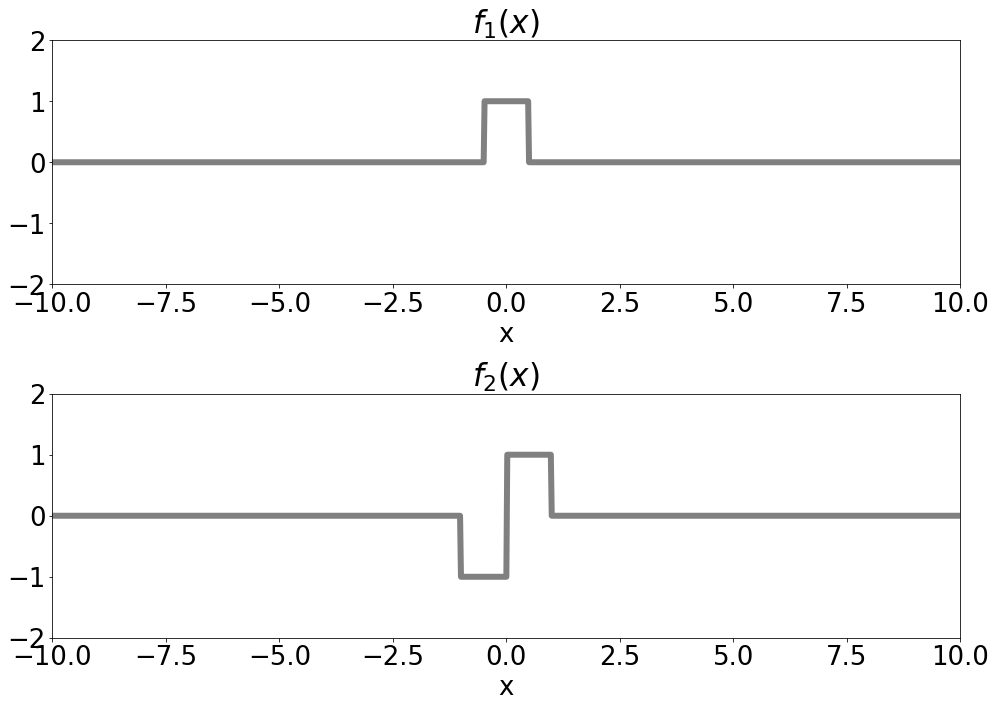

In [42]:
# Simulate 1D input signal f1(x) and f2(x)
N = 1001
xmax = 10
x = np.linspace(-xmax,xmax,N)
dx = x[1]-x[0]
f1 = 1.0*(np.abs(x)<0.5)
f2 = 1.0*(np.abs(x-0.5)<0.5) - 1.0*(np.abs(x+0.5)<=0.5)


font = {'weight' : 'normal',
        'size'   : 26}

# Plot the two signals
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.rc('font', **font)
plt.plot(x,f1,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.xlabel('x')
plt.title('$f_1(x)$')
plt.subplot(2,1,2)
plt.rc('font', **font)
plt.plot(x,f2,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.title('$f_2(x)$')
plt.xlabel('x')
plt.tight_layout(pad=0.5)

Value of the convolution f3(x) = [f_1 * f_2] (x) evaluated at x=x0:  0.480000


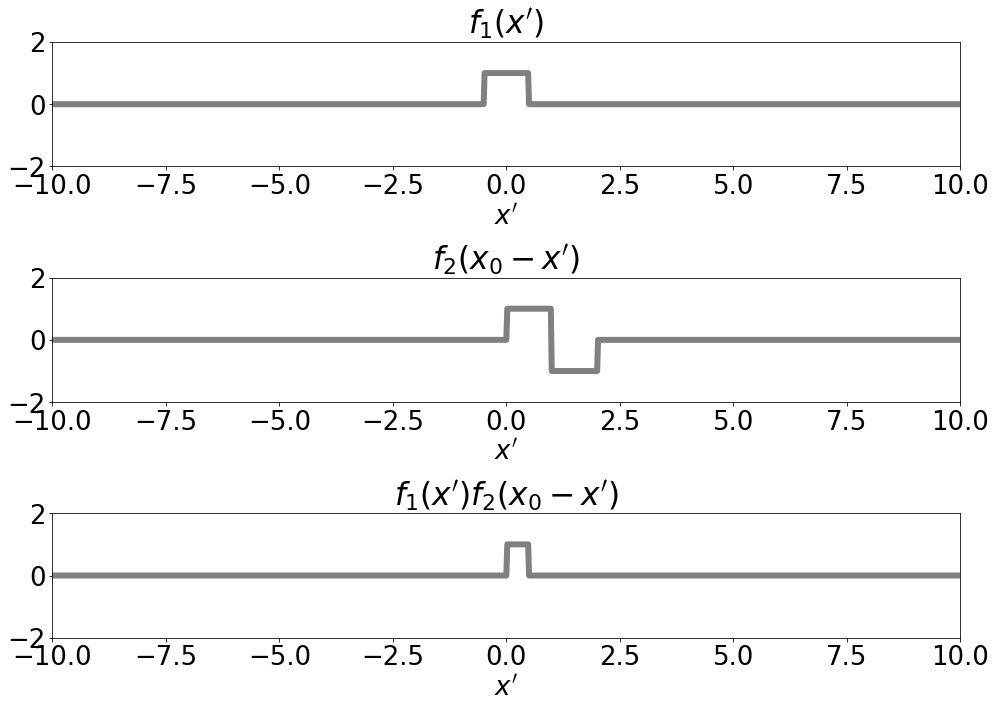

In [41]:
# Now let's look at the convolution integral (sum in reality since we are in a discrete example) 
# evaluated at a particular value of x = x0

x0 = 1.0

f1_xprime = f1

f2_flipped = f2[N-1::-1]
h =  (x==x0) # Delta function at x0
f2_xprime = signal.convolve(h, f2_flipped, mode='same') # Shift by x0, notice implementation as convolution

# Plot the two signals as a function of x', as they appear in the convolution integral
plt.figure(figsize=(14,10))
plt.subplot(3,1,1)
plt.rc('font', **font)
plt.plot(x,f1_xprime,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.xlabel('$x^{\prime}$')
plt.title('$f_1(x^{\prime})$')
plt.subplot(3,1,2)
plt.rc('font', **font)
plt.plot(x,f2_xprime,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.title('$f_2(x_0 - x^{\prime})$')
plt.xlabel('$x^{\prime}$')
plt.tight_layout(pad=0.5)
plt.subplot(3,1,3)
plt.rc('font', **font)
plt.plot(x,f1_xprime*f2_xprime,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.title('$f_1(x^{\prime}) f_2(x_0 - x^{\prime})$')
plt.xlabel('$x^{\prime}$')
plt.tight_layout(pad=0.5)


# Value of the convolution integral at x=x0 (integral evaluated numerically as a sum)
f3_at_x0 = np.sum(f1_xprime*f2_xprime)*dx
print("Value of the convolution f3(x) = [f_1 * f_2] (x) evaluated at x=x0: ", '{:f}'.format(f3_at_x0))

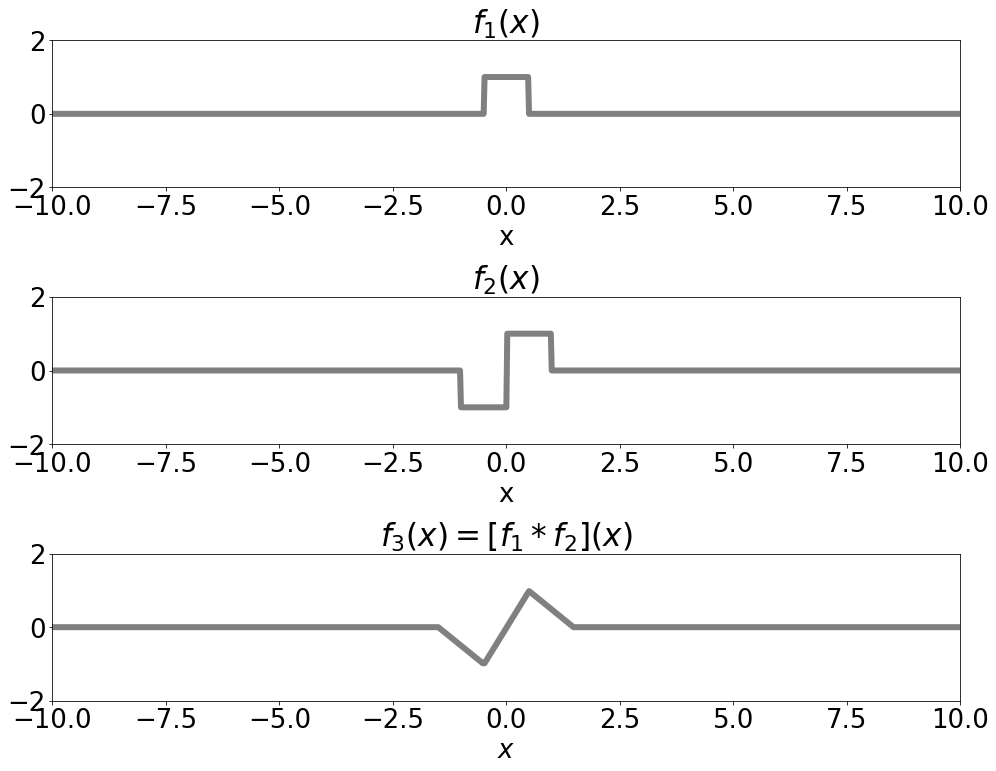

In [48]:
# Now let's evaluate this overall convolution  
f3 = dx*signal.convolve(f1, f2, mode='same')


# Plot the two signals f1 and f2, and their convolution f3
plt.figure(figsize=(14,10))
plt.subplot(3,1,1)
plt.rc('font', **font)
plt.plot(x,f1,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.xlabel('x')
plt.title('$f_1(x)$')
plt.subplot(3,1,2)
plt.rc('font', **font)
plt.plot(x,f2,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.title('$f_2(x)$')
plt.xlabel('x')
plt.tight_layout(pad=0.5)
plt.subplot(3,1,3)
plt.rc('font', **font)
plt.plot(x,f3,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.title('$f_3(x) = [f_1 * f_2] (x)$')
plt.xlabel('$x$');